In [60]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf

In [61]:
files = os.listdir('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results')

In [62]:
dfs = []
for f in files:
    df1 = pd.read_csv('C:\\Users\\gosti\\Downloads\\Telegram Desktop\\results\\results\\Adygeja_Resp_2022-03-20.csv', encoding = 'utf-8')
    dfs.append(df1)

In [63]:
data = pd.concat(dfs)

In [64]:
results = pd.read_excel(r'C:\\Users\\gosti\\Downloads\\Telegram Desktop\\01_04_D_New_loans_subj.xlsx', sheet_name='итого', header=1)

In [65]:
data = data.drop(columns=data[['customer inn', 'supplier inn', 'protocol date', 'doc']])
data = data.assign(bg=data.amount / data.price)
data = data.drop_duplicates()
data = data[data.bg <= 1]
data

,Unnamed: 0,obj hash,name,reg num,sign date,suppliers count,st date,end date,price,enforcement,amount,bg
0,0,3793294491059705333,contracts_output,1010101008321000004,2021-09-27,1,2021-09-27,2021-12-31,500000.00,1,25000.00,0.050000
1,1,-4348589201702449915,contracts_output,1010400570119000014,2019-08-08,1,2021-01-01,2021-12-31,933718.40,1,373500.00,0.400014
2,2,7104910193783858246,contracts_output,1010400570119000016,2019-09-03,1,2021-01-01,2021-12-31,125125.25,0,6256.26,0.050000
3,3,-1585908082334183978,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,355169.38,1,19878.00,0.055968
4,4,-3961364508861951295,contracts_output,1010400570119000027,2019-09-24,1,2021-01-01,2021-12-31,388020.88,1,19878.00,0.051229
...,...,...,...,...,...,...,...,...,...,...,...,...
6359,6359,-4906157625135826188,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6360,6360,-8165939967697628755,contracts_output,3010800386421000022,2021-10-04,1,2021-10-04,2022-01-31,1452000.00,0,72600.00,0.050000
6361,6361,-725861710018253917,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106600.00,1,5500.00,0.051595
6362,6362,-2881107635711435453,contracts_output,3010800386421000025,2021-10-25,1,2021-10-25,2021-12-31,106599.90,1,5500.00,0.051595


In [66]:
data['st date'] = data['st date'].astype('datetime64[ns]')
data['end date'] = data['end date'].astype('datetime64[ns]')

In [67]:
date_list = pd.date_range('01.01.2019', '01.05.2023', freq='M')

In [68]:
t = (data.iloc[1])

In [69]:
d = list(map(lambda x: datetime.datetime(2019,6,25)<= x<= datetime.datetime(2021,12,31),date_list))

In [70]:
def check(st, end):
    return list(map(lambda x: st<= x <= end, date_list))

In [71]:
t_arr = np.zeros(len(date_list))

In [72]:
for r in data.iterrows():
    t_arr+=np.array(check(r[1]['st date'], r[1]['end date'])) * r[1]['amount']

In [73]:
df = pd.DataFrame(t_arr)

<AxesSubplot:>

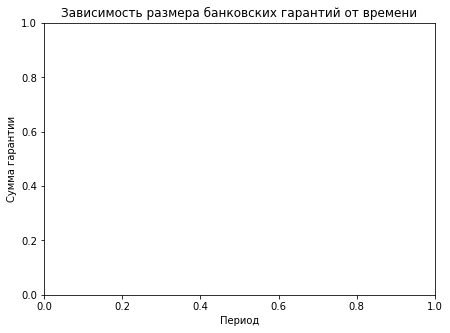

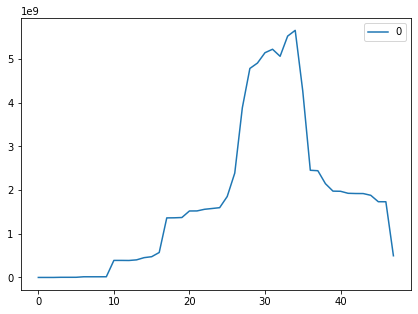

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,5
plt.xlabel('Период')
plt.ylabel('Сумма гарантии')
plt.title('Зависимость размера банковских гарантий от времени')
df.plot()

# Задачи
* Подгрузка данных и их форматирование
* Анализ Корреляции двух рядов
* Продумать методы прогнозирования ряда
 + Какие модели можно использовать
 + Что делать с идеей аккумулирующего эффекта
 + Первый драфт


In [75]:
res = pd.DataFrame(results.iloc[0])

In [76]:
res1 = pd.DataFrame(res[-43:])
res1 = res1.rename_axis('date').reset_index()
res1 = res1.rename(columns={0: "credit"})
res1['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')
res1 = res1.set_index('date')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [77]:
df2 = df[:43]

In [78]:
df2 = df2.rename(columns={0: "amount"})
df2 = df2.rename_axis('date').reset_index()
df2['date'] = pd.date_range('31.01.2019', '31.07.2022', freq='M')

C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.01.2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\gosti\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31.07.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
df2 = df2.set_index('date')

In [21]:
data1 = pd.concat([df2,res1], axis=1, join='inner')

In [22]:
data1.credit = data1.credit.astype(int)
data1 = data1.reindex(columns=['credit', 'amount'])

In [ ]:
writer = pd.ExcelWriter('Data.xlsx')
data1.to_excel(writer,'data')
writer.save()
print('DataFrame is written successfully')

In [302]:
data1

,credit,amount,HWES3_ADD
date,,,
2019-01-31,3202534,0.000000e+00,-4.038990e+08
2019-02-28,3504045,0.000000e+00,1.094387e+08
2019-03-31,4174296,0.000000e+00,2.414890e+08
2019-04-30,4637280,3.351258e+06,6.308585e+08
2019-05-31,3345201,3.351258e+06,1.966465e+08
2019-06-30,4124086,3.512462e+06,1.315633e+08
2019-07-31,5143083,1.527409e+07,-6.701092e+08
2019-08-31,5062245,1.527409e+07,-3.848158e+07
2019-09-30,5264321,1.527409e+07,3.486107e+07


In [305]:
r1 = df2.month_num.corr(data1.amount)
r2 = data1.credit.astype(int).corr(data1.amount)
print('Значение коэффициента корреляции между объемом банковских гарантий и периодом = ', np.round(r1, 3))
print('Значение коэффициента корреляции между объемом банковских гарантий и размером кредита = ', np.round(r2, 3))

Значение коэффициента корреляции между объемом банковских гарантий и периодом =  nan
Значение коэффициента корреляции между объемом банковских гарантий и размером кредита =  0.657


## Прогнозирование
sklearn:
* OLS и GLS - разница
* Регуляризация L1, L2

Этапы жизни модели:
* EDA
* preprocessing (Standartscaler, RFE and feature selection)
* data to : train, test, predict
    + fit
    + predict on test ( Metrics: r2,MAPE,MAE)
    + predict on predict with fitting on train+test


y = x0 + a1x1 + b(x2)^ + a2*t

### Что посмотреть:
* Борьба с сезнонностью (Ряд Фурье, STL разложение)
* Модели Экспоненциального сглаживания  (ETS Хольт-Уинтерс)
* ACF
* stl = STL(*params)
* res = stl.fit(y)

In [306]:
from statsmodels.tsa.stattools import adfuller

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

### Что сделать:
* Построить регрессию от времени
* Построить регрессию от времени + кредиты
* Построить регрессию от кредитов
* Сравнить между собой по r^2,MAE,MAPE
* Экспоненциальное сглаживание


**Регрессионная модель**

*Гарантии+время*

In [80]:
df2

,date,amount
0,2019-01-31,0.000000e+00
1,2019-02-28,0.000000e+00
2,2019-03-31,0.000000e+00
3,2019-04-30,3.351258e+06
4,2019-05-31,3.351258e+06
5,2019-06-30,3.512462e+06
6,2019-07-31,1.527409e+07
7,2019-08-31,1.527409e+07
8,2019-09-30,1.527409e+07
9,2019-10-31,1.591606e+07


Text(0, 0.5, 'Amount')

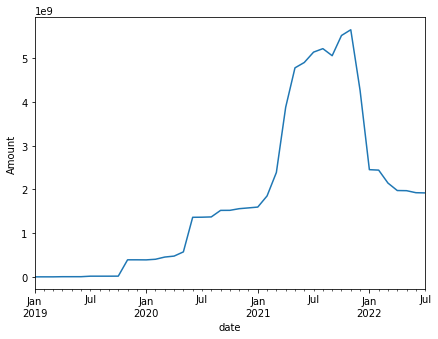

In [27]:
data1.amount.plot()
plt.ylabel('Amount')

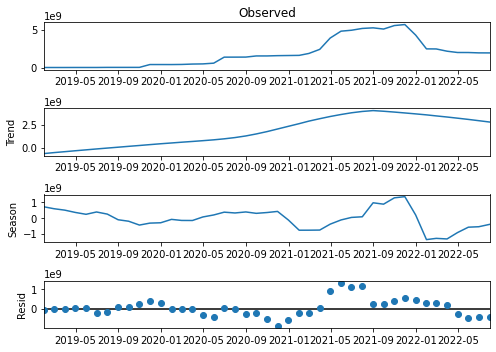

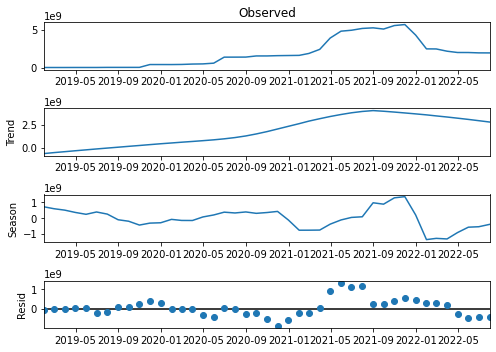

In [38]:
stl = STL(df2, period=12).fit()
stl.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(stl.observed)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.8988361046387081
Ряд не стационарный


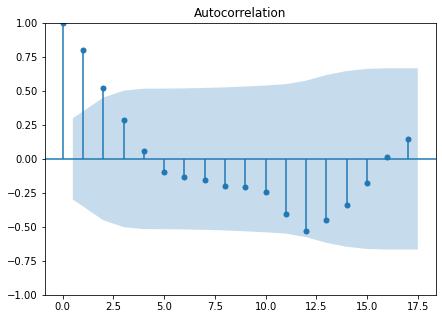

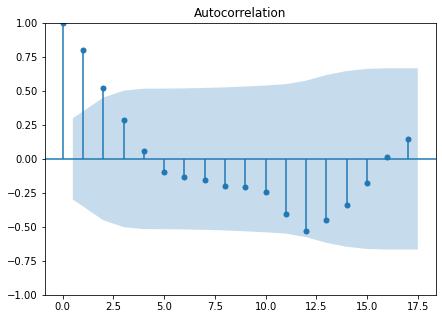

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stl.resid)

C:\Users\gosti\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log10 от руб.')

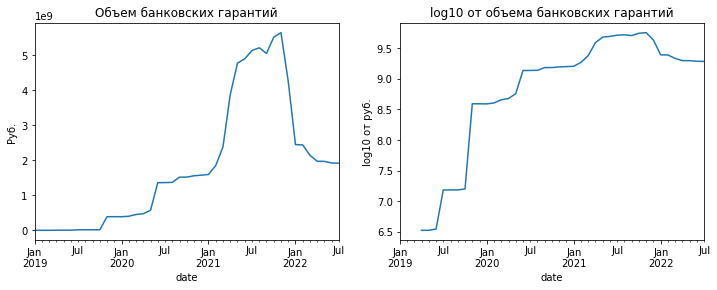

In [34]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
data1['amount'].plot(ax=ax1)
ax1.set_title(u'Объем банковских гарантий')
ax1.set_ylabel(u'Руб.')
ax2 = fig.add_subplot(122)
pd.Series(np.log10(data1['amount'])).plot(ax=ax2)
ax2.set_title(u'log10 от объема банковских гарантий')
ax2.set_ylabel(u'log10 от руб.')

In [83]:
new_dates = pd.date_range('2019-01-01', '2019-12-01', freq='M')
new_dates = pd.Index(df2['date']) | new_dates
df3 = pd.DataFrame({'date': new_dates})
df4 = pd.merge(df2, df3, on='date', how='right')

C:\Temp\ipykernel_11004\3902561724.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  new_dates = pd.Index(df2['date']) | new_dates


In [84]:
df4

,date,amount
0,2019-01-31,0.000000e+00
1,2019-02-28,0.000000e+00
2,2019-03-31,0.000000e+00
3,2019-04-30,3.351258e+06
4,2019-05-31,3.351258e+06
5,2019-06-30,3.512462e+06
6,2019-07-31,1.527409e+07
7,2019-08-31,1.527409e+07
8,2019-09-30,1.527409e+07
9,2019-10-31,1.591606e+07


In [90]:
df2['month_num'] = range(1,len(df2)+1)
df2['log_y'] = np.log10(df2['amount'])

C:\Users\gosti\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [107]:
for x in range(1,13):
    df2['season_' + str(x)] = df2['date'].dt.month == x

In [280]:
season_columns = ['season_' + str(x) for x in range(1,13)]
X = df2[['month_num'] + season_columns]
Y = df2['log_y']
X1 = X[X.index < 36]
Y1 = Y[Y.index < 36]

In [281]:
df2.fillna(0, inplace=True)

In [282]:
df2

,date,amount,month_num,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12,log_y,t^2,t^3
0,2019-01-31,0.000000e+00,1,True,False,False,False,False,False,False,False,False,False,False,False,0.000000,1,1
1,2019-02-28,0.000000e+00,2,False,True,False,False,False,False,False,False,False,False,False,False,0.000000,4,8
2,2019-03-31,0.000000e+00,3,False,False,True,False,False,False,False,False,False,False,False,False,0.000000,9,27
3,2019-04-30,3.351258e+06,4,False,False,False,True,False,False,False,False,False,False,False,False,6.525208,16,64
4,2019-05-31,3.351258e+06,5,False,False,False,False,True,False,False,False,False,False,False,False,6.525208,25,125
5,2019-06-30,3.512462e+06,6,False,False,False,False,False,True,False,False,False,False,False,False,6.545612,36,216
6,2019-07-31,1.527409e+07,7,False,False,False,False,False,False,True,False,False,False,False,False,7.183955,49,343
7,2019-08-31,1.527409e+07,8,False,False,False,False,False,False,False,True,False,False,False,False,7.183955,64,512
8,2019-09-30,1.527409e+07,9,False,False,False,False,False,False,False,False,True,False,False,False,7.183955,81,729
9,2019-10-31,1.591606e+07,10,False,False,False,False,False,False,False,False,False,True,False,False,7.201835,100,1000


In [283]:
from sklearn.linear_model import LinearRegression

In [284]:
model = LinearRegression()
model.fit(X1,Y1)

LinearRegression()

In [285]:
import math

<AxesSubplot:>

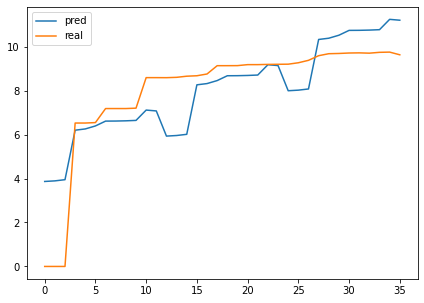

In [286]:
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': Y1})
pred.plot()

<AxesSubplot:>

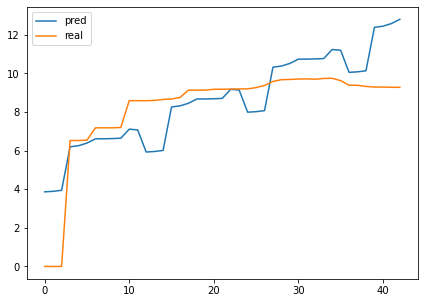

In [287]:
#прогноз
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': Y})
pred.plot()

In [288]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y, model.predict(X))
mse = mean_squared_error(Y, model.predict(X))
R2 = r2_score(Y, model.predict(X))
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))

MAE =  1.34
MSE = 3.122
Коэффициент детерминации = 0.472


*Гарантии+время, полином 3 степени*

In [289]:
df2['t^2'] = df2['month_num']**2
df2['t^3'] = df2['month_num']**3

In [290]:
df2

,date,amount,month_num,season_1,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12,log_y,t^2,t^3
0,2019-01-31,0.000000e+00,1,True,False,False,False,False,False,False,False,False,False,False,False,0.000000,1,1
1,2019-02-28,0.000000e+00,2,False,True,False,False,False,False,False,False,False,False,False,False,0.000000,4,8
2,2019-03-31,0.000000e+00,3,False,False,True,False,False,False,False,False,False,False,False,False,0.000000,9,27
3,2019-04-30,3.351258e+06,4,False,False,False,True,False,False,False,False,False,False,False,False,6.525208,16,64
4,2019-05-31,3.351258e+06,5,False,False,False,False,True,False,False,False,False,False,False,False,6.525208,25,125
5,2019-06-30,3.512462e+06,6,False,False,False,False,False,True,False,False,False,False,False,False,6.545612,36,216
6,2019-07-31,1.527409e+07,7,False,False,False,False,False,False,True,False,False,False,False,False,7.183955,49,343
7,2019-08-31,1.527409e+07,8,False,False,False,False,False,False,False,True,False,False,False,False,7.183955,64,512
8,2019-09-30,1.527409e+07,9,False,False,False,False,False,False,False,False,True,False,False,False,7.183955,81,729
9,2019-10-31,1.591606e+07,10,False,False,False,False,False,False,False,False,False,True,False,False,7.201835,100,1000


In [291]:
season_columns = ['season_' + str(x) for x in range(1,13)]
X2 = df2[['month_num', 't^2', 't^3'] + season_columns]
Y2 = df2['amount']
X3 = X2[X.index < 36]
Y3 = Y2[Y.index < 36]

In [292]:
model2 = LinearRegression()
model.fit(X3,Y3)

LinearRegression()

<AxesSubplot:>

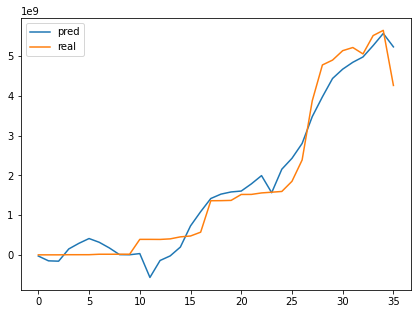

In [293]:
pred = pd.DataFrame({
    'pred': model.predict(X3),
    'real': Y3})
pred.plot()

<AxesSubplot:>

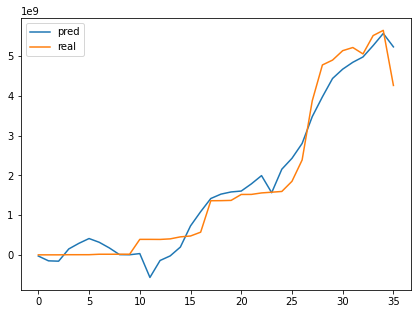

In [294]:
#прогноз
pred2 = pd.DataFrame({
    'pred': model.predict(X2),
    'real': Y2})
pred.plot()

In [295]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y2, model.predict(X2))
mse = mean_squared_error(Y2, model.predict(X2))
R2 = r2_score(Y2, model.predict(X2))
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))


MAE =  1127608850.136
MSE = 4.902224615891822e+18
Коэффициент детерминации = -0.522


*Гарантии+кредит полином 3 степени*

C:\Users\gosti\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log10 от руб.')

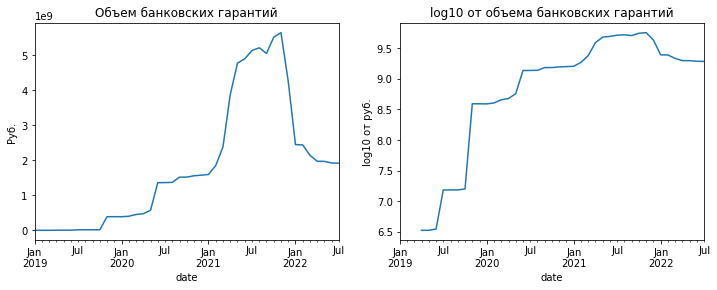

In [297]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
data1['amount'].plot(ax=ax1)
ax1.set_title(u'Объем банковских гарантий')
ax1.set_ylabel(u'Руб.')
ax2 = fig.add_subplot(122)
pd.Series(np.log10(data1['amount'])).plot(ax=ax2)
ax2.set_title(u'log10 от объема банковских гарантий')
ax2.set_ylabel(u'log10 от руб.')

Text(0, 0.5, 'Credit')

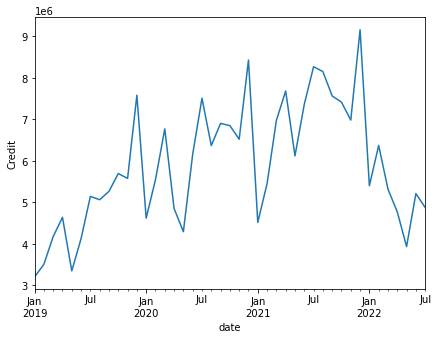

In [90]:
data1.credit.plot()
plt.ylabel('Credit')

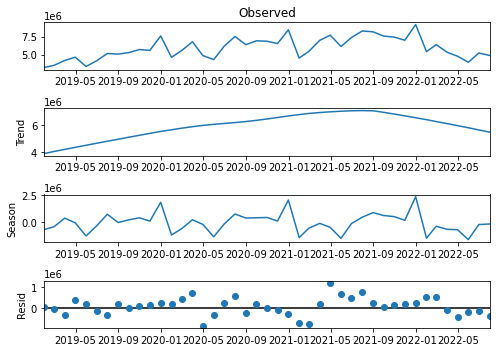

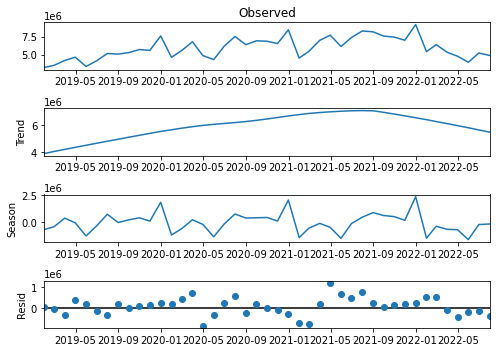

In [109]:
stl_credit = STL(res1, period=12).fit()
stl_credit.plot()

In [107]:
adf_test = adfuller(stl_credit.observed)
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
    print('Ряд не стационарный')
else:
    print('Ряд стационарный')

p-value = 0.003679831625530393
Ряд стационарный


In [ ]:
for x in range(1,13):
    res1['season_' + str(x)] = res1['']

**Модель Хольта-Винтерса**

In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose

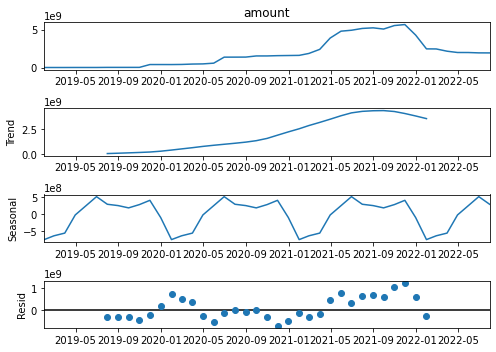

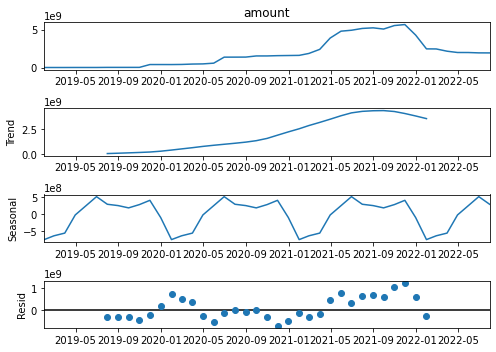

In [183]:
decompose_result = seasonal_decompose(data1['amount'],model='additive')
decompose_result.plot()

In [176]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [175]:
m = 12
alpha = 1/(2*m)

C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive Seasonality'}, xlabel='date'>

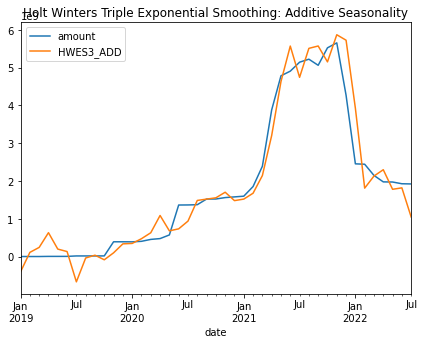

In [186]:
data1['HWES3_ADD'] = ExponentialSmoothing(data1['amount'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data1[['amount','HWES3_ADD']].plot(title='Holt Winters Triple Exponential Smoothing: Additive Seasonality')

In [233]:
train_amount = data1.amount[:24]
test_amount = data1.amount[24:]

In [242]:
fitted_model = ExponentialSmoothing(data1['amount'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(19)

C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\gosti\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test')

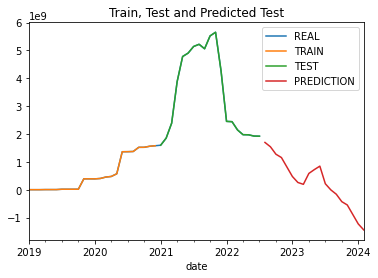

In [243]:
data1.amount.plot(legend=True,label='REAL')
train_amount.plot(legend=True,label='TRAIN')
test_amount.plot(legend=True,label='TEST', figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test')

ConversionError: Failed to convert value(s) to axis units: '2022–31–07'

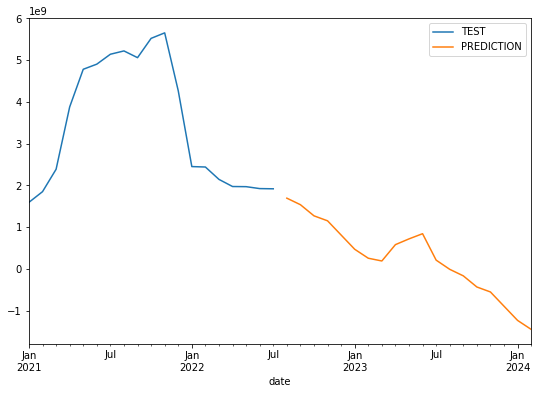

In [247]:
test_amount.plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2022–31–07','2023–31–07'])

In [245]:
mae_HW = mean_absolute_error(test_amount, test_predictions)
mse = mean_squared_error(test_amount, test_predictions)
R2 = r2_score(test_amount, test_predictions)
print('MAE = ', np.round(mae, 3))
print('MSE =', np.round(mse, 3))
print('Коэффициент детерминации =', np.round(R2, 3))

MAE =  1825868224.522
MSE = 1.2170708600327645e+19
Коэффициент детерминации = -4.464
